# Homework#2: Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

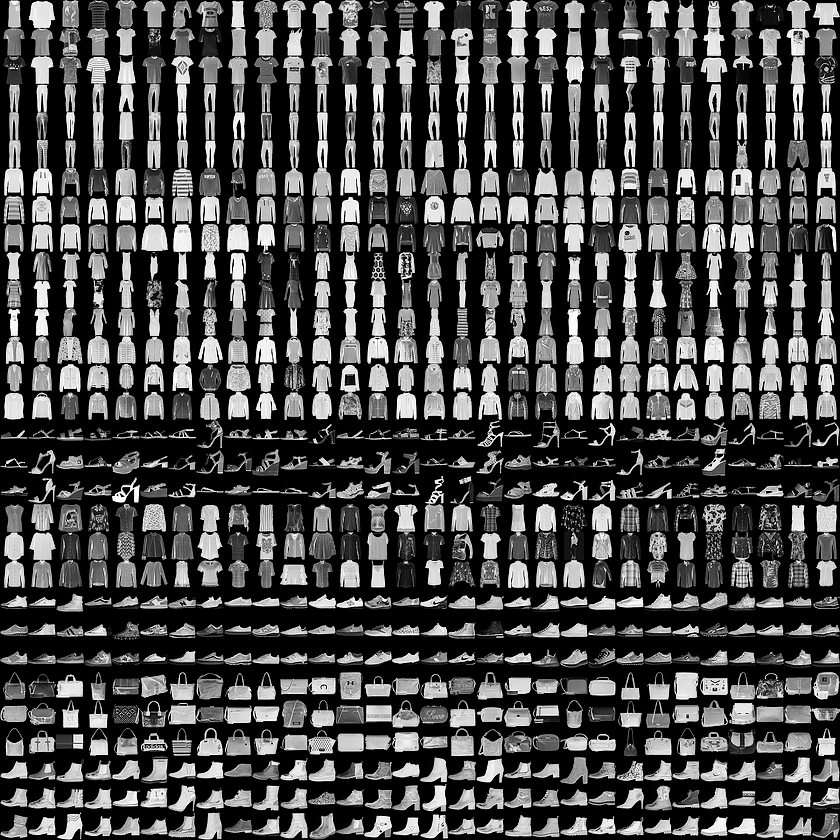

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from TrainingNeuralNets notebook for handwriten digits recogntion, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [ ]:
import torch
from torchvision import datasets, transforms

import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/dgofman/PythonAI/main/Deep%20Learning/Homework2/helper.py', './helper_module.py')
import helper_module as helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

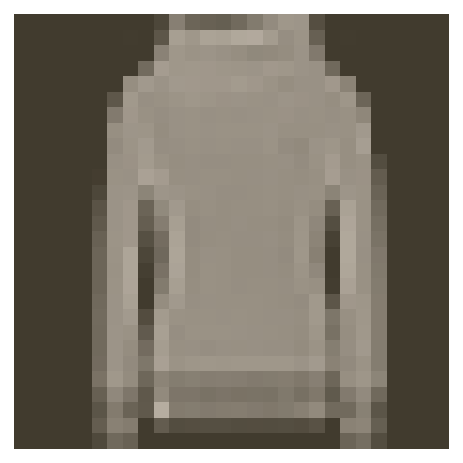

In [ ]:
image, label = next(iter(trainloader))
helper.imshow(image[10,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [ ]:
# TODO: Define your network architecture here
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [ ]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim
model = Network()
#optimizer = optim.Adam(model.parameters(), lr=0.003)
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [ ]:
# TODO: Train the network here
model.train() #prep model for training

from timeit import default_timer   
start = default_timer()

#defining the loss function
criterion = nn.NLLLoss()
epochs = 6
train_losses, valid_losses = [],[]
for e in range(epochs):
  running_loss = 0 
  valid_loss = 0
   # train the model #
  for images, labels in trainloader:

     optimizer.zero_grad()
     log_ps = model(images)
     loss = criterion(log_ps, labels)
     loss.backward()
     optimizer.step()
     running_loss += loss.item()*images.size(0)
  
  for images, labels in testloader:
     log_ps = model(images)
     loss = criterion(log_ps, labels)
     valid_loss += loss.item()*images.size(0)

  running_loss = running_loss/len(trainloader.sampler)
  valid_loss =  valid_loss/len(testloader.sampler)
  train_losses.append(running_loss)
  valid_losses.append(valid_loss)

  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(e+1, running_loss,valid_loss))

print("Training Time:", default_timer()-start)   

Epoch: 1 	Training Loss: 2.055255 	Validation Loss: 1.527221
Epoch: 2 	Training Loss: 1.120153 	Validation Loss: 0.894012
Epoch: 3 	Training Loss: 0.780347 	Validation Loss: 0.719002
Epoch: 4 	Training Loss: 0.664218 	Validation Loss: 0.646773
Epoch: 5 	Training Loss: 0.607958 	Validation Loss: 0.605776
Epoch: 6 	Training Loss: 0.571590 	Validation Loss: 0.578664
Training Time: 100.40900323500045


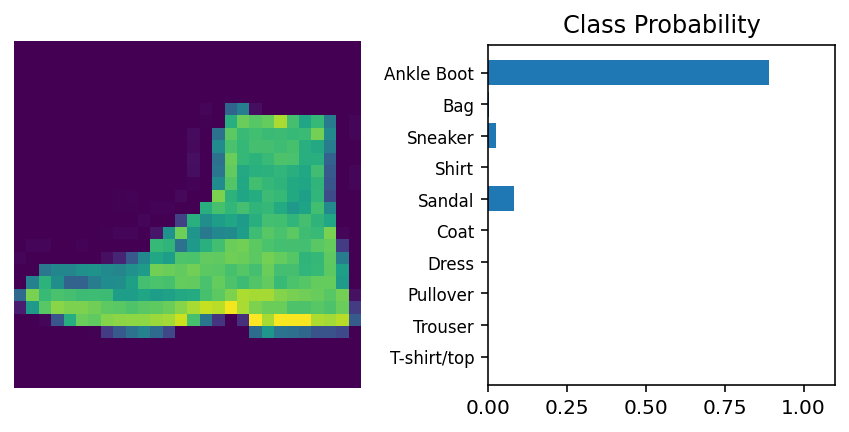

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!
# Note that we will use images from testset instead of trainset

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

## Extra Credit: Other Evaluation of model and results of adjusting the model

Add any other evaluation of the performance of your model or adjustment of your model in the following ...

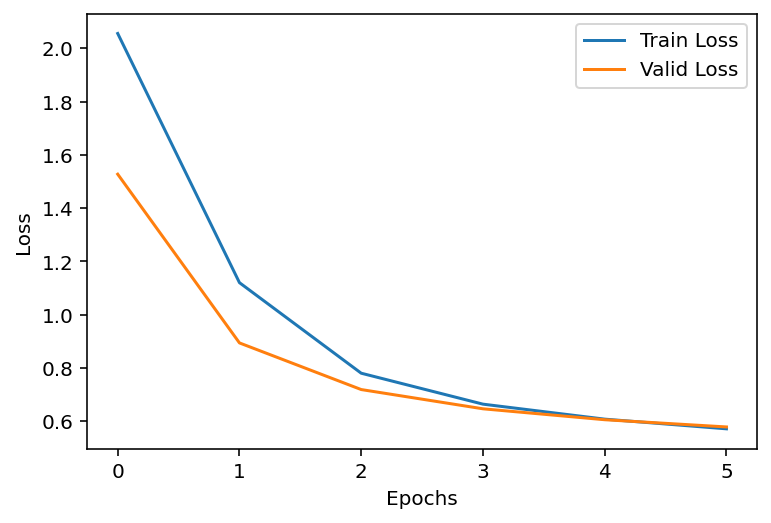

In [29]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Found the first 40 invalid images and valid images: 141


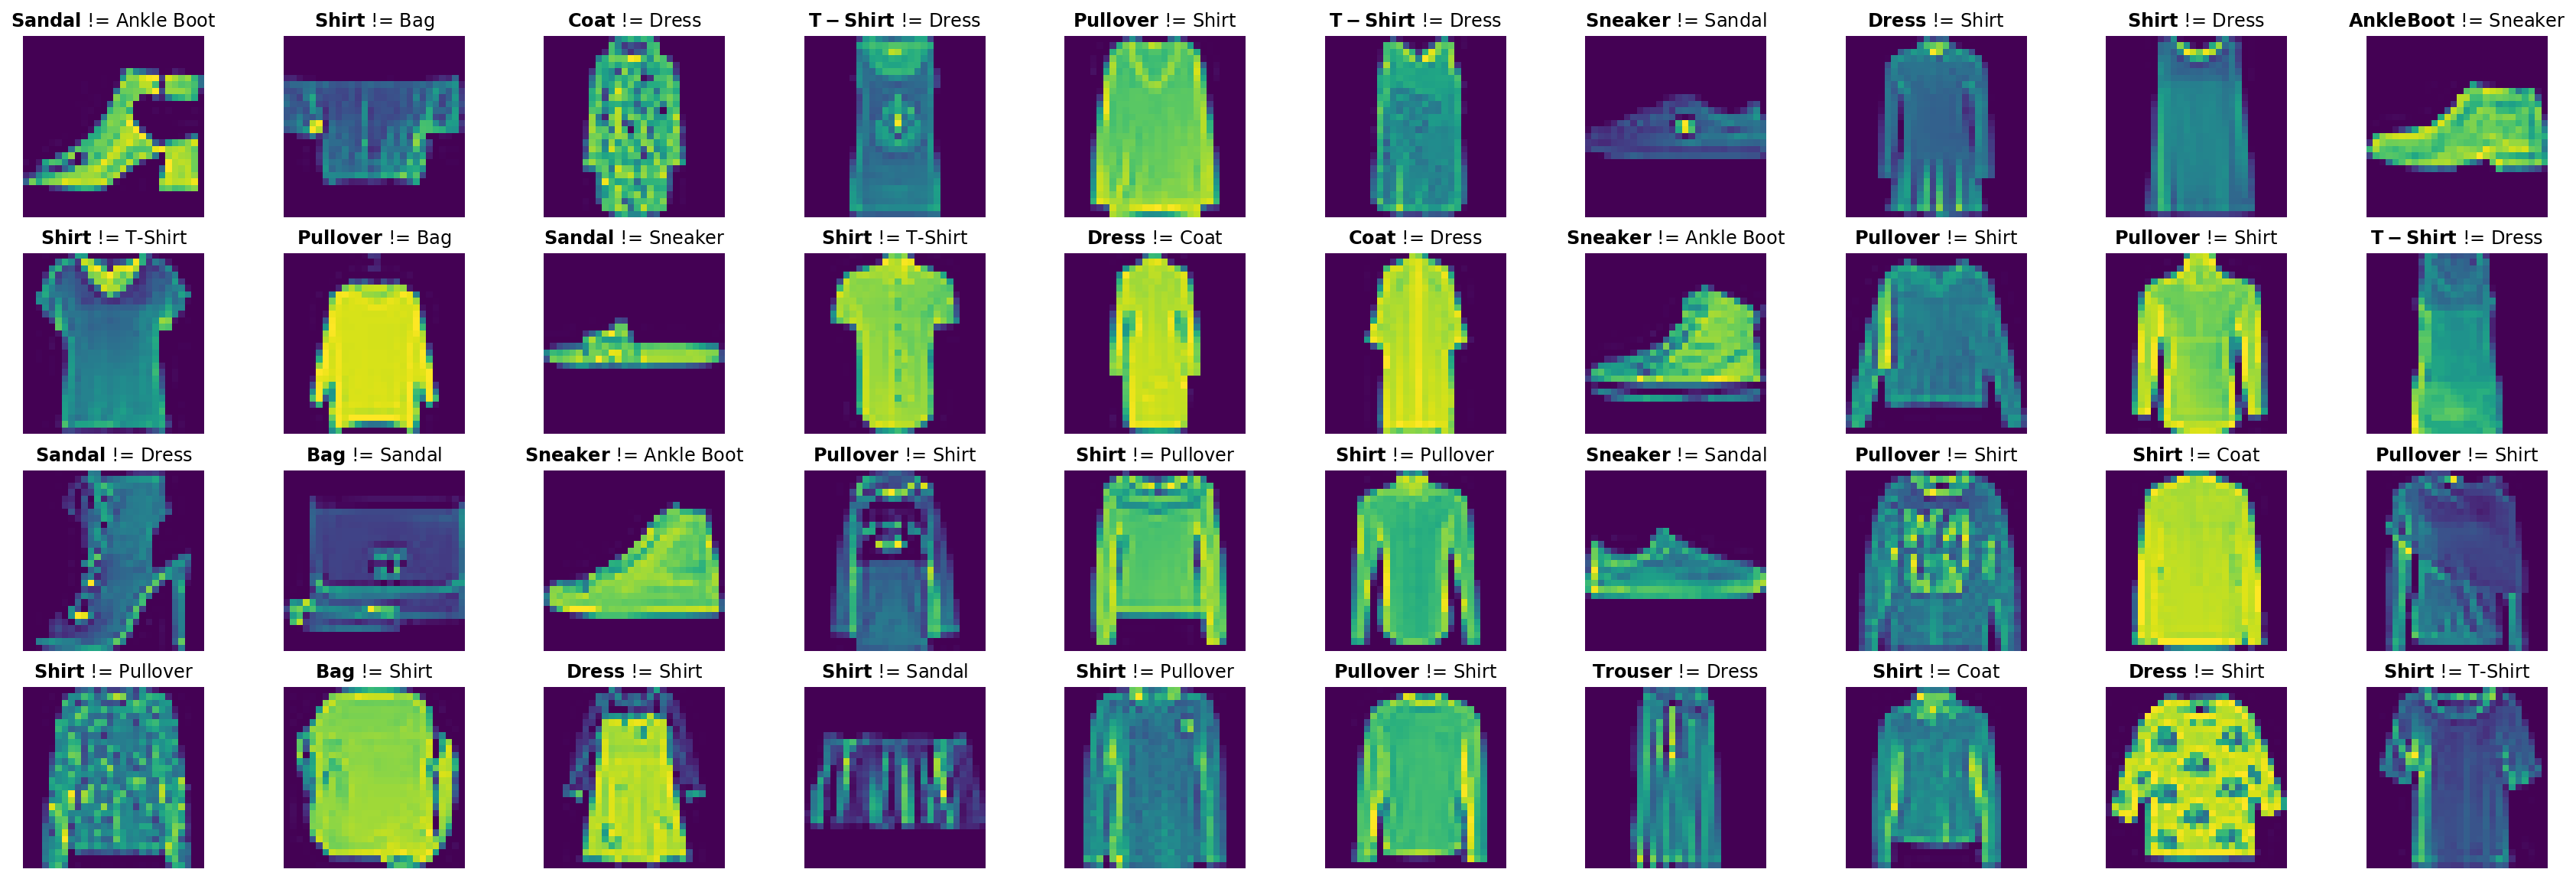

In [38]:
import numpy as np

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(30, 10))

def drawImages(labels_map):
  invalid_labels = 0
  valid_labels = 0
  max_images = 40
  for images, labels in testloader:
    # get sample outputs
    output = model(images)
    # convert output probabilities to predicted class
    _, preds = torch.max(output, 1)
    for idx, pred in enumerate(preds):
      if pred == labels[idx]:
        valid_labels += 1
      else:
        invalid_labels += 1
        fig.add_subplot(max_images / 10, 10, invalid_labels)
        plt.axis("off")
        plt.imshow(np.squeeze(images[idx]))
        plt.title(r"$\bf{" + str(labels_map[labels[idx].item()]) + "}$ != " + labels_map[pred.item()])
        if invalid_labels == max_images:
          print("Found the first {} invalid images and valid images: {}".format(max_images, valid_labels))  
          return

drawImages({
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
})